## **PART 1 : DEFINE RL ENVIRONMENT**

In [ ]:
! pip install gym

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time

import random


In [ ]:
# Creating the grid environment
class GridEnvironment(gym.Env):
  def __init__(self) -> None:
    super().__init__()
    self.observation_space=spaces.Discrete(16)
    self.action_space=spaces.Discrete(4)
    self.action=0
    self.count_a=1
    self.count_b=1
    self.count_s=1
    self.count_al=1
    self.max_timesteps=12
    self.currAgent_Pos=[0,0]
    self.reward=0
    self.reward_cumulative=0
    self.reward_apple=0
    self.reward_banana=0
    self.reward_smoke=0
    self.reward_alcohol=0
    self.goal_reward=40
    self.agent_pos=[0,0]
    self.goal_pos=[3,3]
    self.apple=[1,1]
    self.banana=[3,2]
    self.smoke=[2,0]
    self.alcohol=[1,3]
    self.timestep=1
    self.next_state=0 # debugging

  def reset(self):
    #self.state_sarsa=0 # debugging
    self.action=0
    self.count_a=1
    self.count_b=1
    self.count_s=1
    self.count_al=1
    self.timestep=1
    self.currAgent_Pos=[0,0]
    self.reward=0
    self.reward_cumulative=0
    self.reward_apple=12
    self.reward_banana=15
    self.reward_smoke=-10
    self.reward_alcohol=-12
    self.goal_reward=200
    self.next_state=0
    self.agent_pos=[0,0]
    self.goal_pos=[3,3]
    self.apple=[1,1]
    self.banana=[3,2]
    self.smoke=[2,0]
    self.alcohol=[1,3]
    self.state=np.zeros((4,4))
    self.state[tuple(self.agent_pos)]=10
    self.state[tuple(self.goal_pos)]=4
    self.state[tuple(self.apple)]=6.5 #pos reward +6
    self.state[tuple(self.banana)]=6.5 #pos reward +6
    self.state[tuple(self.smoke)]=8.5 #neg reward -8
    self.state[tuple(self.alcohol)]=8.5 #neg reward -4
    observation =self.state.flatten()
    
    #observe = self.state
    return self.next_state
  def step(self,action):
    self.state=np.random.choice(self.observation_space.n)
    if action == 0:
      self.agent_pos[0]+=1#down
    if action == 1:
      self.agent_pos[0]-=1#up
    if action == 2:
      self.agent_pos[1]+=1#right 
    if action == 3:
      self.agent_pos[1]-=1#left
    self.agent_pos=np.clip(self.agent_pos,0,3)# clip is to ensure we stay in our grid world
    self.state=np.zeros((4,4))
    self.state[tuple(self.agent_pos)]=10
    self.state[tuple(self.goal_pos)]=4
    self.state[tuple(self.apple)]=6.5 #pos reward +6
    self.state[tuple(self.banana)]=6.5 #pos reward +6
    self.state[tuple(self.smoke)]=8.5 #neg reward -8
    self.state[tuple(self.alcohol)]=8.5 #neg reward -4
    obsevation=self.state.flatten()
    if (((self.agent_pos == self.apple) & (self.timestep <= self.max_timesteps)) & (self.count_a<2)).all():# put && condition for not done value
       self.reward+=self.reward_apple
       self.count_a+=1
    if(((self.agent_pos == self.banana) & (self.timestep <= self.max_timesteps)) & (self.count_b<2)).all():
       self.reward+=self.reward_banana
       self.count_b+=1
    if((self.agent_pos == self.smoke) & (self.timestep <= self.max_timesteps)).all(): #& (self.count_s<2)).all(): #if count grater thn 2 dont add the ward and in the reset reste the count.
      self.reward+=self.reward_smoke
      self.count_s+=1
    if((self.agent_pos == self.alcohol) & (self.timestep <= self.max_timesteps)).all():# & (self.count_al<2)).all():
      self.reward+=self.reward_alcohol
      self.count_al+=1
    if((self.agent_pos == self.goal_pos) & (self.timestep <= self.max_timesteps)).all():
      self.reward=self.reward+self.goal_reward
      self.reward_cumulative=self.reward+self.goal_reward
    self.timestep+=1
    done=True if self.timestep >= self.max_timesteps or np.array_equal(self.agent_pos, [3, 3])  else False # Agent position should be updated here
    info ={}
    return obsevation, self.reward, done, info
  

  def render(self):
    plt.imshow(self.state)


' actions : 0 -down, 1 - up, 2 - right, 3 -left'

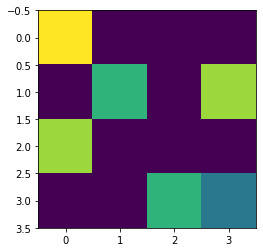

In [ ]:
env = GridEnvironment()
env.reset()
env.render()
''' actions : 0 -down, 1 - up, 2 - right, 3 -left'''


Reward 0
False


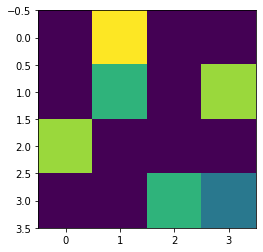

In [ ]:
#Debugging purpose and checking my reward
action =2
obsevation,reward, done, info = env.step(action)
print('Reward', reward)
print(done)
env.render()


In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env=env
    self.observation_space=env.observation_space
    self.action_space=env.action_space

  def step(self,obs):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

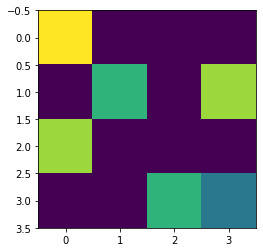

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

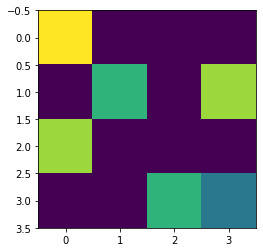

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

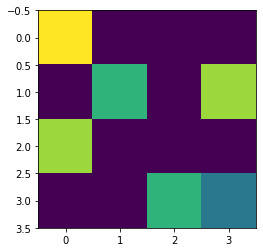

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

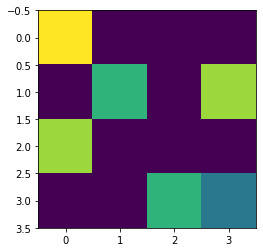

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

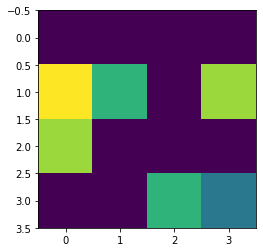

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

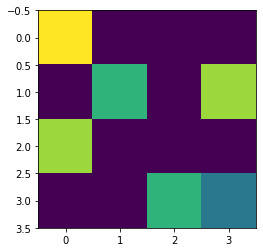

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

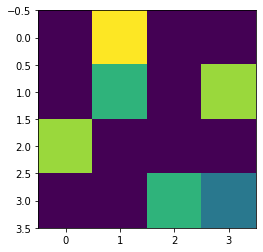

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

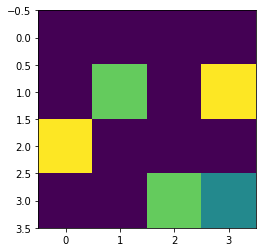

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

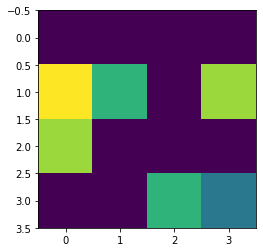

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

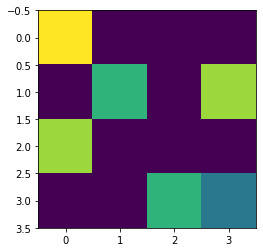

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

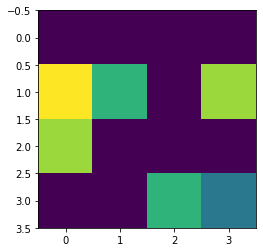

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

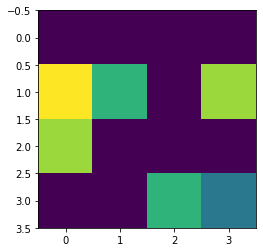

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
env=GridEnvironment()
agent=RandomAgent(env)

obs=env.reset()
done=False
output_grid= widgets.Grid(1,1)
with output_grid.output_to(0,0):
  env.render()

  while not done:
    action=agent.step(obsevation)
    obsevation,reward,done, info= env.step(action)
    output_grid= widgets.Grid(1,1)
    with output_grid.output_to(0,0):
      env.render()
      print("                     ")

    time.sleep(1)

## **PART 2 : SARSA Algorithm**

In [ ]:
# Creating SARSA agent
class SARSA:
  def __init__(self,env):
    self.env=env
    self.epsilon = 1
    self.max_epsilon = 1.0
    self.min_epsilon = 0.01
    self.decay_rate = 0.005 # for agent exploration more close to zero takes greedy for the agent from the q table
    self.rewards =[]
    self.eps_decay=0.92 # slowly decrease it and rediuce the epsilon value, so that epsilon will converge and become greedy.
    self.gamma=0.85
    self.alpha=0.3
    self.epsilon_arr=[]
    self.qtable = np.zeros((env.observation_space.n,env.action_space.n))
    self.state=self.env.reset()
    self.num_actions=env.action_space.n
    #print(self.qtable)

  def action_greedy(self, qtable, epsilon, num_actions, state):
      exp= random.uniform(0,1)
      if exp > self.epsilon:
          actions = np.argmax(self.qtable[state]) # once we converge epsilon near to zero we start taking the actions frm the q table that is greedy.
      else:
          actions=np.random.randint(self.num_actions)
      return actions
  
  def train(self, episodes):
    #t_reward=0
    agent_movement=0
    done=False

    for i in range(episodes):
      state = self.env.reset() #self.env.reset() INITIALIZING S State =0
      t_reward=0
      inti_actions=0#inititalize the actions that is old actions.
      inti_actions=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, self.state))
      done=False
      while done==False: # when ever we reach the goal as well we need to make the doone as true
          
          next_state,reward,done, info = env.step(inti_actions)
          next_state=(4*env.agent_pos[0]+env.agent_pos[1])
          next_action=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, next_state))
          self.qtable[state,inti_actions]= self.qtable[state,inti_actions] +self.alpha*(reward+ self.gamma * np.max(self.qtable[next_state,next_action]) - self.qtable[state,inti_actions])

          state=next_state
          inti_actions=next_action
          t_reward+=reward # rewards once reward sis taken we need not add it again.
          if done==True : 
            break
          #state=next_state
      
      self.rewards.append(t_reward) # first element in this reward is calculated for 1 episode sum of all the rewards agent has moved that is till done == true. 
      self.epsilon=self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*i) 
      self.epsilon_arr.append(self.epsilon)
    print("FINAL Q TABLE AFTER NUMBER OF EPISODES \n")
    print(self.qtable)
    print("\n")
    print("FINAL EPISODES REWARDS")
    print(self.rewards[-1])
    print("\n")
    print("FINAL EPISODES EPSILON")
    print(self.epsilon_arr[-1])
    #return self.qtable[state,actions]
  
  def graphs(self):

        plt.figure(figsize=(8, 6))
        plt.plot(self.rewards, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel(' Rewards Value', fontsize=22)
        plt.title('Total Rewards Per Episode', fontsize=22)
        plt.grid()
        plt.show()
        
        print('          \n          ')

        plt.figure(figsize=(8, 6))
        plt.plot(self.epsilon_arr, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel('Epsilon Values', fontsize=22)
        plt.title('Epsilon Decay', fontsize=22)
        plt.grid()
        plt.show()

  def Agent(self):
        
        self.env.train = False
        state = self.env.reset()
        state=(4*env.agent_pos[0]+env.agent_pos[1])
        done= False # keep track of iteration is finished or not
        output_grid= widgets.Grid(1,1)
        with output_grid.output_to(0,0):
          env.render()
        
          while done == False:
          # randomize a number 
          
          #exp= random.uniform(0,1)
            print("The State Of the Agent")
            print(state)
            action = np.argmax(self.qtable[state])
            print("Action Taken by Agent from Q table")
            print(action)

          #self.env.render()
          
            next_state,reward,done, info = self.env.step(action)
            
            print("Maximum Reward Collected By The Agent")
            print(reward)
            next_state=(4*env.agent_pos[0]+env.agent_pos[1])
            print("Q table's action Next State")
            print(next_state)
            state = next_state
            output_grid= widgets.Grid(1,1)
            with output_grid.output_to(0,0):
              env.render()
            time.sleep(1)
       
            if done == True:
              break



In [ ]:
env=GridEnvironment()
env.reset()
agent=SARSA(env)
agent.train(1000)


FINAL Q TABLE AFTER NUMBER OF EPISODES 

[[ 44.67969574  40.60737321  60.47971551  37.45909474]
 [ 82.39629555  57.96651836  59.98102255  32.22765606]
 [106.12451281  51.80082525  12.24461659  29.7911411 ]
 [-14.66152472  -3.22128835   0.35705611  35.36952119]
 [ 13.85310514  28.70190923  87.04966105  38.24792635]
 [ 96.41843944  69.99518455 109.12492475  68.61905271]
 [139.89140786  76.14657535  92.39487585  78.40620947]
 [142.64033053  -5.54034177  49.37289599  -5.29524526]
 [  1.45886662  53.1111826   17.53850287 -19.32666722]
 [ 88.30320931  67.11944323 141.36003604  29.98180704]
 [184.96819649  87.46272775 156.5001225  107.85804517]
 [208.9606609   58.40226309 128.50823164  62.45411122]
 [  6.93664199 -11.24891452  -2.51444925  -2.75508581]
 [ 68.2386671    8.89656169 182.65876038   2.25410622]
 [180.97639437 142.83285618 227.         151.18790459]
 [  0.           0.           0.           0.        ]]


FINAL EPISODES REWARDS
290


FINAL EPISODES EPSILON
0.01670400388797824


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The State Of the Agent
0
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
0
Q table's action Next State
1


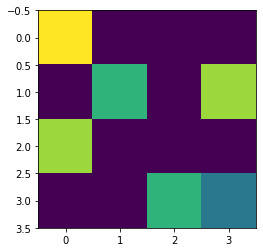

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

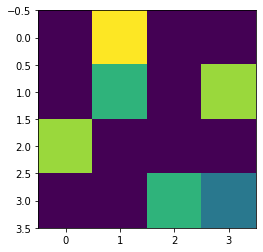

<IPython.core.display.Javascript object>

The State Of the Agent
1
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
5


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

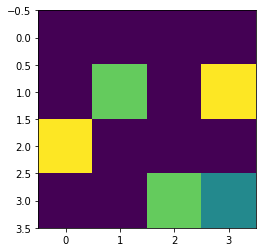

<IPython.core.display.Javascript object>

The State Of the Agent
5
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
12
Q table's action Next State
6


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

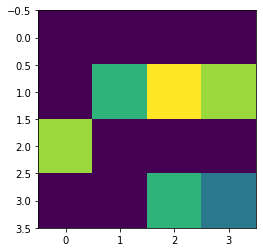

<IPython.core.display.Javascript object>

The State Of the Agent
6
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

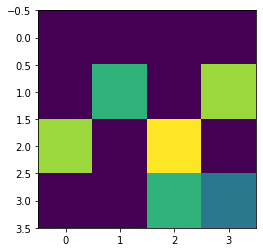

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

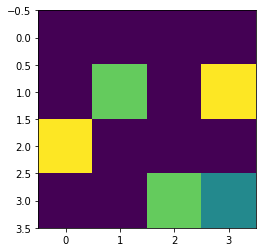

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
227
Q table's action Next State
15


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

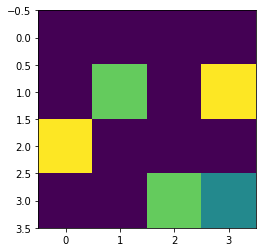

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

' actions : 0 -down, 1 - up, 2 - right, 3 -left'

In [ ]:
agent.Agent()
''' actions : 0 -down, 1 - up, 2 - right, 3 -left'''

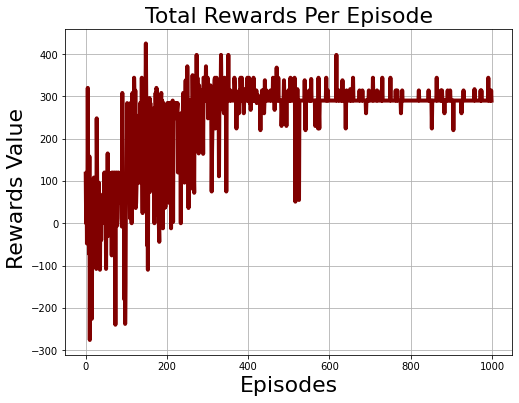

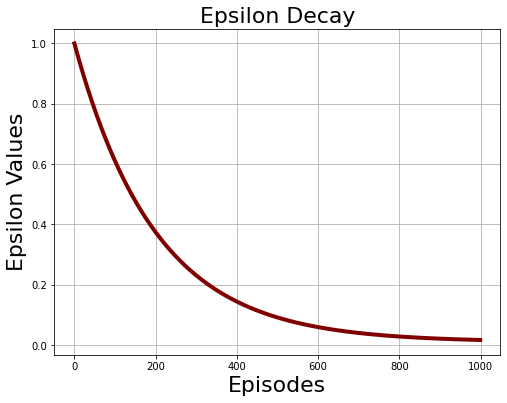

In [ ]:
agent.graphs()

## **QUESTION 7 IN REPORT PART 2**

**Having Gamma value 0.95 and iterations to 1000**




In [ ]:
class SARSA:
  def __init__(self,env):
    self.env=env
    self.epsilon = 1
    self.max_epsilon = 1.0
    self.min_epsilon = 0.01
    self.decay_rate = 0.005 # for agent exploration more close to zero takes greedy for the agent from the q table
    self.rewards =[]
    self.eps_decay=0.92 # slowly decrease it and rediuce the epsilon value, so that epsilon will converge and become greedy.
    self.gamma=0.95
    self.alpha=0.3
    self.epsilon_arr=[]
    self.qtable = np.zeros((env.observation_space.n,env.action_space.n))
    self.state=self.env.reset()
    self.num_actions=env.action_space.n
    #print(self.qtable)

  def action_greedy(self, qtable, epsilon, num_actions, state):
      exp= random.uniform(0,1)
      if exp > self.epsilon:
          actions = np.argmax(self.qtable[state]) # once we converge epsilon near to zero we start taking the actions frm the q table that is greedy.
      else:
          actions=np.random.randint(self.num_actions)
      return actions
  
  def train(self, episodes):
    #t_reward=0
    agent_movement=0
    done=False

    for i in range(episodes):
      state = self.env.reset() #self.env.reset() INITIALIZING S State =0
      t_reward=0
      inti_actions=0#inititalize the actions that is old actions.
      inti_actions=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, self.state))
      done=False
      while done==False: # when ever we reach the goal as well we need to make the doone as true
          
          next_state,reward,done, info = env.step(inti_actions)
          next_state=(4*env.agent_pos[0]+env.agent_pos[1])
          next_action=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, next_state))
          self.qtable[state,inti_actions]= self.qtable[state,inti_actions] +self.alpha*(reward+ self.gamma * np.max(self.qtable[next_state,next_action]) - self.qtable[state,inti_actions])

          state=next_state
          inti_actions=next_action
          t_reward+=reward # rewards once reward sis taken we need not add it again.
          if done==True : 
            break
          #state=next_state
      
      self.rewards.append(t_reward) # first element in this reward is calculated for 1 episode sum of all the rewards agent has moved that is till done == true. 
      self.epsilon=self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*i) 
      self.epsilon_arr.append(self.epsilon)
    print("FINAL Q TABLE AFTER NUMBER OF EPISODES \n")
    print(self.qtable)
    print("\n")
    print("FINAL EPISODES REWARDS")
    print(self.rewards[-1])
    print("\n")
    print("FINAL EPISODES EPSILON")
    print(self.epsilon_arr[-1])
    #return self.qtable[state,actions]
  
  def graphs(self):

        plt.figure(figsize=(8, 6))
        plt.plot(self.rewards, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel(' Rewards Value', fontsize=22)
        plt.title('Total Rewards Per Episode', fontsize=22)
        plt.grid()
        plt.show()
        
        print('          \n          ')

        plt.figure(figsize=(8, 6))
        plt.plot(self.epsilon_arr, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel('Epsilon Values', fontsize=22)
        plt.title('Epsilon Decay', fontsize=22)
        plt.grid()
        plt.show()

  def Agent(self):
        
        self.env.train = False
        state = self.env.reset()
        state=(4*env.agent_pos[0]+env.agent_pos[1])
        done= False # keep track of iteration is finished or not
        output_grid= widgets.Grid(1,1)
        with output_grid.output_to(0,0):
          env.render()
        
          while done == False:
          # randomize a number 
          
          #exp= random.uniform(0,1)
            print("The State Of the Agent")
            print(state)
            action = np.argmax(self.qtable[state])
            print("Action Taken by Agent from Q table")
            print(action)

          #self.env.render()
          
            next_state,reward,done, info = self.env.step(action)
            
            print("Maximum Reward Collected By The Agent")
            print(reward)
            next_state=(4*env.agent_pos[0]+env.agent_pos[1])
            print("Q table's action Next State")
            print(next_state)
            state = next_state
            output_grid= widgets.Grid(1,1)
            with output_grid.output_to(0,0):
              env.render()
            time.sleep(1)
       
            if done == True:
              break



FINAL Q TABLE AFTER NUMBER OF EPISODES 

[[288.54360139 244.76127885 436.47968522 326.2226765 ]
 [459.2931027  384.57342414 248.10078465 340.72267058]
 [215.59471906  99.00885674  66.5397978  362.91101676]
 [ -6.34907971   7.41390999  11.13131771 109.09477009]
 [152.77448024 178.26767381 444.03379325 194.56365195]
 [469.41734604 356.54084811 382.86631134 387.33589873]
 [480.87207524  92.15466342  55.10650098 225.04173919]
 [141.46557667  16.18439069  14.74005475  52.93973955]
 [-16.98446766  48.99766107 424.73547516 -16.46507641]
 [396.05337707 344.80911728 478.40584439 358.68198067]
 [458.0585735  401.52389721 226.4156045  410.29423873]
 [219.92711788  10.54775162  54.80437804   7.61091075]
 [ 30.10065235 -23.67727467 300.03380415  53.8560338 ]
 [278.82823553 405.95013827 482.66441578 238.01295515]
 [401.42488531 451.45192117 226.99997836 404.96003911]
 [  0.           0.           0.           0.        ]]


FINAL EPISODES REWARDS
225


FINAL EPISODES EPSILON
0.01670400388797824


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The State Of the Agent
0
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
0
Q table's action Next State
1


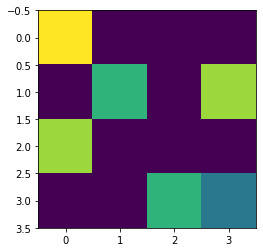

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

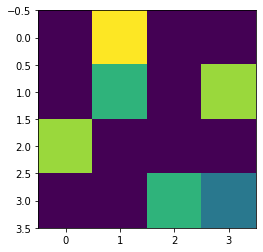

<IPython.core.display.Javascript object>

The State Of the Agent
1
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
5


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

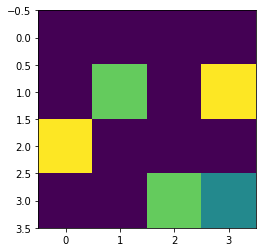

<IPython.core.display.Javascript object>

The State Of the Agent
5
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
9


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

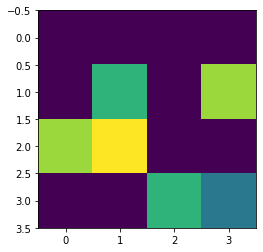

<IPython.core.display.Javascript object>

The State Of the Agent
9
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
12
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

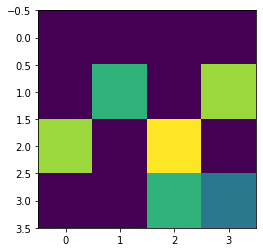

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

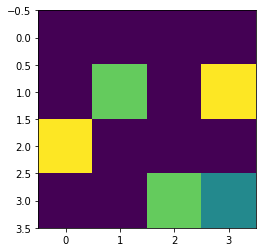

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
1
Maximum Reward Collected By The Agent
27
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

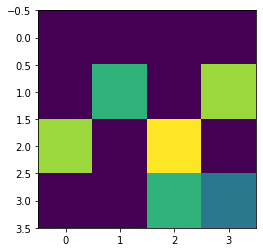

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

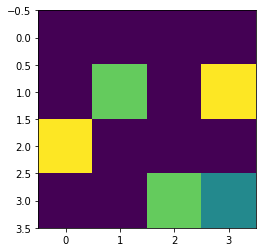

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
1
Maximum Reward Collected By The Agent
27
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

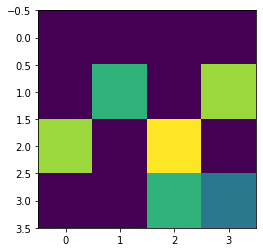

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

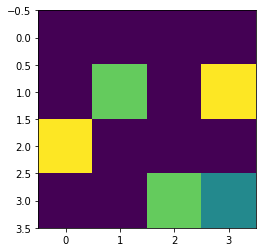

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
1
Maximum Reward Collected By The Agent
27
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

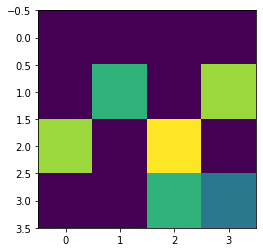

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

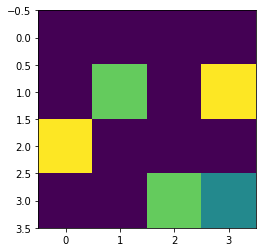

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

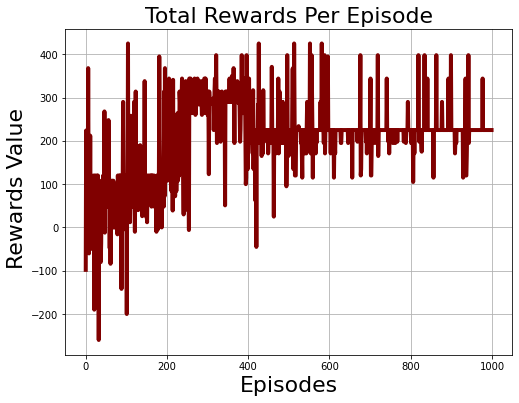

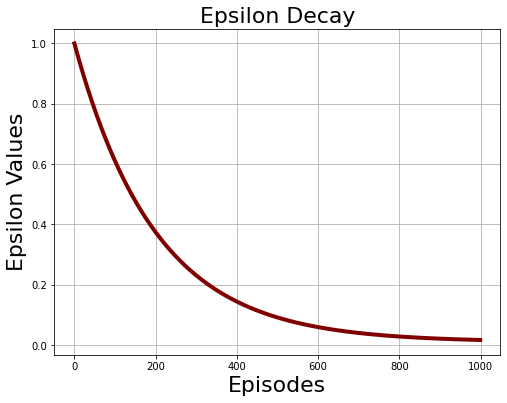

In [ ]:
env=GridEnvironment()
env.reset()
agent=SARSA(env)
agent.train(1000)
agent.Agent()
agent.graphs()

**Having Gamma Value changed to 0.7 and iteration changed to 600**

In [ ]:
# SARSA agent
class SARSA:
  def __init__(self,env):
    self.env=env
    self.epsilon = 1
    self.max_epsilon = 1.0
    self.min_epsilon = 0.01
    self.decay_rate = 0.005 # for agent exploration more close to zero takes greedy for the agent from the q table
    self.rewards =[]
    self.eps_decay=0.92 # slowly decrease it and rediuce the epsilon value, so that epsilon will converge and become greedy.
    self.gamma=0.7
    self.alpha=0.3
    self.epsilon_arr=[]
    self.qtable = np.zeros((env.observation_space.n,env.action_space.n))
    self.state=self.env.reset()
    self.num_actions=env.action_space.n
    #print(self.qtable)

  def action_greedy(self, qtable, epsilon, num_actions, state):
      exp= random.uniform(0,1)
      if exp > self.epsilon:
          actions = np.argmax(self.qtable[state]) # once we converge epsilon near to zero we start taking the actions frm the q table that is greedy.
      else:
          actions=np.random.randint(self.num_actions)
      return actions
  
  def train(self, episodes):
    #t_reward=0
    agent_movement=0
    done=False

    for i in range(episodes):
      state = self.env.reset() #self.env.reset() INITIALIZING S State =0
      t_reward=0
      inti_actions=0#inititalize the actions that is old actions.
      inti_actions=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, self.state))
      done=False
      while done==False: # when ever we reach the goal as well we need to make the doone as true
          
          next_state,reward,done, info = env.step(inti_actions)
          next_state=(4*env.agent_pos[0]+env.agent_pos[1])
          next_action=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, next_state))
          self.qtable[state,inti_actions]= self.qtable[state,inti_actions] +self.alpha*(reward+ self.gamma * np.max(self.qtable[next_state,next_action]) - self.qtable[state,inti_actions])

          state=next_state
          inti_actions=next_action
          t_reward+=reward # rewards once reward sis taken we need not add it again.
          if done==True : 
            break
          #state=next_state
      
      self.rewards.append(t_reward) # first element in this reward is calculated for 1 episode sum of all the rewards agent has moved that is till done == true. 
      self.epsilon=self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*i) 
      self.epsilon_arr.append(self.epsilon)
    print("FINAL Q TABLE AFTER NUMBER OF EPISODES \n")
    print(self.qtable)
    print("\n")
    print("FINAL EPISODES REWARDS")
    print(self.rewards[-1])
    print("\n")
    print("FINAL EPISODES EPSILON")
    print(self.epsilon_arr[-1])
    #return self.qtable[state,actions]
  
  def graphs(self):

        plt.figure(figsize=(8, 6))
        plt.plot(self.rewards, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel(' Rewards Value', fontsize=22)
        plt.title('Total Rewards Per Episode', fontsize=22)
        plt.grid()
        plt.show()
        
        print('          \n          ')

        plt.figure(figsize=(8, 6))
        plt.plot(self.epsilon_arr, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel('Epsilon Values', fontsize=22)
        plt.title('Epsilon Decay', fontsize=22)
        plt.grid()
        plt.show()

  def Agent(self):
        
        self.env.train = False
        state = self.env.reset()
        state=(4*env.agent_pos[0]+env.agent_pos[1])
        done= False # keep track of iteration is finished or not
        output_grid= widgets.Grid(1,1)
        with output_grid.output_to(0,0):
          env.render()
        
          while done == False:
          # randomize a number 
          
          #exp= random.uniform(0,1)
            print("The State Of the Agent")
            print(state)
            action = np.argmax(self.qtable[state])
            print("Action Taken by Agent from Q table")
            print(action)

          #self.env.render()
          
            next_state,reward,done, info = self.env.step(action)
            
            print("Maximum Reward Collected By The Agent")
            print(reward)
            next_state=(4*env.agent_pos[0]+env.agent_pos[1])
            print("Q table's action Next State")
            print(next_state)
            state = next_state
            output_grid= widgets.Grid(1,1)
            with output_grid.output_to(0,0):
              env.render()
            time.sleep(1)
       
            if done == True:
              break



FINAL Q TABLE AFTER NUMBER OF EPISODES 

[[ 50.9487722   36.70794951  61.44362106  36.95077492]
 [ 89.00114215  47.72208717  63.20566671  29.12879681]
 [ 95.42997901  39.20343707  10.06459235  41.43780791]
 [  6.72555932  -3.31496556   2.30077096  47.94098915]
 [ 24.53313385  32.89686888  84.84746296  48.45193621]
 [ 94.95173357  63.79064768 110.94939333  60.96055514]
 [141.9174131   72.9496343   55.9996006   68.07403748]
 [133.61417647  11.74286817   3.69310447  -6.01008358]
 [ 38.2696627   -6.37956654  82.93256674 -28.70591777]
 [ 92.78407628  67.22021629 136.05746589  49.30226451]
 [185.85942636  97.60406943 156.3764216   97.64671589]
 [210.53297111 -20.70069426  -3.52484352  39.91877852]
 [  3.48190088  16.60418455 106.82813068  18.97551925]
 [127.95554586  80.02077727 173.51038688  70.1206856 ]
 [183.54491086 127.22047781 226.99991399 145.51689778]
 [  0.           0.           0.           0.        ]]


FINAL EPISODES REWARDS
290


FINAL EPISODES EPSILON
0.059536260815720415


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The State Of the Agent
0
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
0
Q table's action Next State
1


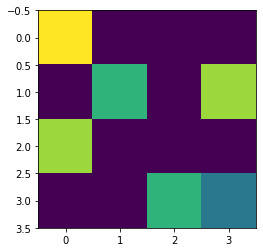

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

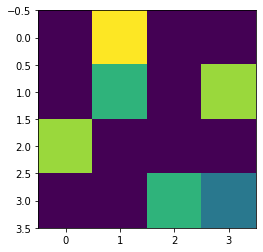

<IPython.core.display.Javascript object>

The State Of the Agent
1
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
5


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

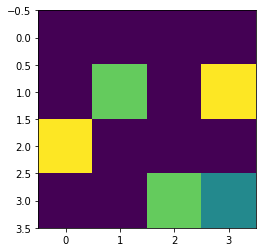

<IPython.core.display.Javascript object>

The State Of the Agent
5
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
12
Q table's action Next State
6


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

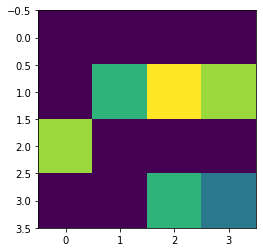

<IPython.core.display.Javascript object>

The State Of the Agent
6
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

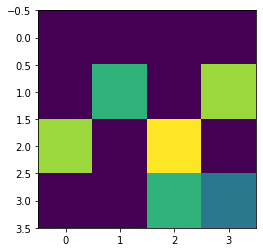

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

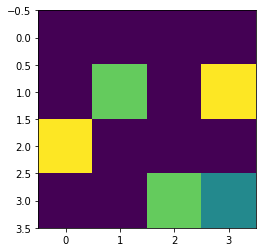

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
227
Q table's action Next State
15


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

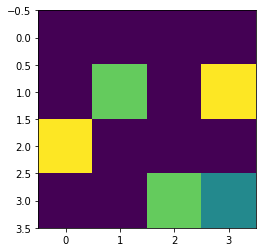

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

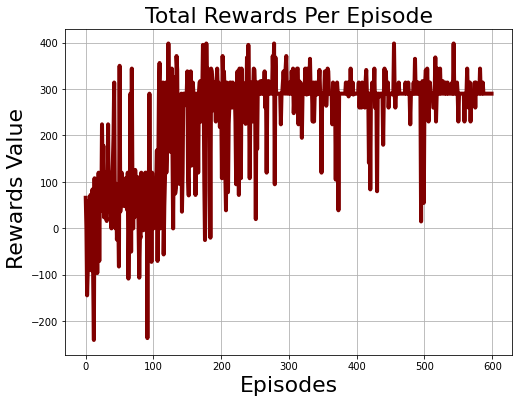

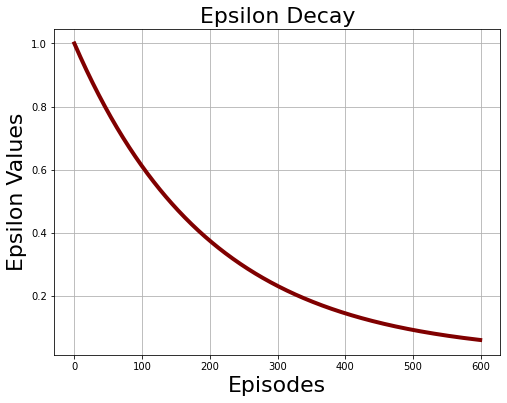

In [ ]:
env=GridEnvironment()
env.reset()
agent=SARSA(env)
agent.train(600)
agent.Agent()
agent.graphs()

## **QUESTION 8 IN REPORT PART 2**

PARAMETERS CHOSEN

1.   DISCOUNT FACTOR 
2.   MAX TIMESTEPS
3.   NUMBER OF EPISODES

In [ ]:
# Creating the environment
class GridEnvironment(gym.Env):
  def __init__(self) -> None:
    super().__init__()
    self.observation_space=spaces.Discrete(16)
    self.action_space=spaces.Discrete(4)
    self.action=0
    self.count_a=1
    self.count_b=1
    self.count_s=1
    self.count_al=1
    self.max_timesteps=12
    self.currAgent_Pos=[0,0]
    self.reward=0
    self.reward_cumulative=0
    self.reward_apple=0
    self.reward_banana=0
    self.reward_smoke=0
    self.reward_alcohol=0
    self.goal_reward=40
    self.agent_pos=[0,0]
    self.goal_pos=[3,3]
    self.apple=[1,1]
    self.banana=[3,2]
    self.smoke=[2,0]
    self.alcohol=[1,3]
    self.timestep=1
    self.next_state=0 # debugging

  def reset(self):
    #self.state_sarsa=0 # debugging
    self.action=0
    self.count_a=1
    self.count_b=1
    self.count_s=1
    self.count_al=1
    self.timestep=1
    self.currAgent_Pos=[0,0]
    self.reward=0
    self.reward_cumulative=0
    self.reward_apple=12
    self.reward_banana=15
    self.reward_smoke=-10
    self.reward_alcohol=-12
    self.goal_reward=200
    self.next_state=0
    self.agent_pos=[0,0]
    self.goal_pos=[3,3]
    self.apple=[1,1]
    self.banana=[3,2]
    self.smoke=[2,0]
    self.alcohol=[1,3]
    self.state=np.zeros((4,4))
    self.state[tuple(self.agent_pos)]=10
    self.state[tuple(self.goal_pos)]=4
    self.state[tuple(self.apple)]=6.5 #pos reward +6
    self.state[tuple(self.banana)]=6.5 #pos reward +6
    self.state[tuple(self.smoke)]=8.5 #neg reward -8
    self.state[tuple(self.alcohol)]=8.5 #neg reward -4
    observation =self.state.flatten()
    
    #observe = self.state
    return self.next_state
  def step(self,action):
    self.state=np.random.choice(self.observation_space.n)
    if action == 0:
      self.agent_pos[0]+=1#down
    if action == 1:
      self.agent_pos[0]-=1#up
    if action == 2:
      self.agent_pos[1]+=1#right 
    if action == 3:
      self.agent_pos[1]-=1#left
    self.agent_pos=np.clip(self.agent_pos,0,3)# clip is to ensure we stay in our grid world
    self.state=np.zeros((4,4))
    self.state[tuple(self.agent_pos)]=10
    self.state[tuple(self.goal_pos)]=4
    self.state[tuple(self.apple)]=6.5 #pos reward +6
    self.state[tuple(self.banana)]=6.5 #pos reward +6
    self.state[tuple(self.smoke)]=8.5 #neg reward -8
    self.state[tuple(self.alcohol)]=8.5 #neg reward -4
    obsevation=self.state.flatten()
    if (((self.agent_pos == self.apple) & (self.timestep <= self.max_timesteps)) & (self.count_a<2)).all():# put && condition for not done value
       self.reward+=self.reward_apple
       self.count_a+=1
    if(((self.agent_pos == self.banana) & (self.timestep <= self.max_timesteps)) & (self.count_b<2)).all():
       self.reward+=self.reward_banana
       self.count_b+=1
    if((self.agent_pos == self.smoke) & (self.timestep <= self.max_timesteps)).all(): #& (self.count_s<2)).all(): #if count grater thn 2 dont add the ward and in the reset reste the count.
      self.reward+=self.reward_smoke
      self.count_s+=1
    if((self.agent_pos == self.alcohol) & (self.timestep <= self.max_timesteps)).all():# & (self.count_al<2)).all():
      self.reward+=self.reward_alcohol
      self.count_al+=1
    if((self.agent_pos == self.goal_pos) & (self.timestep <= self.max_timesteps)).all():
      self.reward=self.reward+self.goal_reward
      self.reward_cumulative=self.reward+self.goal_reward
    self.timestep+=1
    done=True if self.timestep >= self.max_timesteps or np.array_equal(self.agent_pos, [3, 3])  else False # Agent position should be updated here
    info ={}
    return obsevation, self.reward, done, info
  

  def render(self):
    plt.imshow(self.state)


In [ ]:
# SARSA agent
class SARSA:
  def __init__(self,env):
    self.env=env
    self.epsilon = 1
    self.max_epsilon = 1.0
    self.min_epsilon = 0.01
    self.decay_rate = 0.005 # for agent exploration more close to zero takes greedy for the agent from the q table
    self.rewards =[]
    self.eps_decay=0.92 # slowly decrease it and rediuce the epsilon value, so that epsilon will converge and become greedy.
    self.gamma=0.7
    self.alpha=0.3
    self.epsilon_arr=[]
    self.qtable = np.zeros((env.observation_space.n,env.action_space.n))
    self.state=self.env.reset()
    self.num_actions=env.action_space.n
    #print(self.qtable)

  def action_greedy(self, qtable, epsilon, num_actions, state):
      exp= random.uniform(0,1)
      if exp > self.epsilon:
          actions = np.argmax(self.qtable[state]) # once we converge epsilon near to zero we start taking the actions frm the q table that is greedy.
      else:
          actions=np.random.randint(self.num_actions)
      return actions
  
  def train(self, episodes):
    #t_reward=0
    agent_movement=0
    done=False

    for i in range(episodes):
      state = self.env.reset() #self.env.reset() INITIALIZING S State =0
      t_reward=0
      inti_actions=0#inititalize the actions that is old actions.
      inti_actions=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, self.state))
      done=False
      while done==False: # when ever we reach the goal as well we need to make the doone as true
          
          next_state,reward,done, info = env.step(inti_actions)
          next_state=(4*env.agent_pos[0]+env.agent_pos[1])
          next_action=int(self.action_greedy(self.qtable, self.epsilon, self.num_actions, next_state))
          self.qtable[state,inti_actions]= self.qtable[state,inti_actions] +self.alpha*(reward+ self.gamma * np.max(self.qtable[next_state,next_action]) - self.qtable[state,inti_actions])

          state=next_state
          inti_actions=next_action
          t_reward+=reward # rewards once reward sis taken we need not add it again.
          if done==True : 
            break
          #state=next_state
      
      self.rewards.append(t_reward) # first element in this reward is calculated for 1 episode sum of all the rewards agent has moved that is till done == true. 
      self.epsilon=self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*i) 
      self.epsilon_arr.append(self.epsilon)
    print("FINAL Q TABLE AFTER NUMBER OF EPISODES \n")
    print(self.qtable)
    print("\n")
    print("FINAL EPISODES REWARDS")
    print(self.rewards[-1])
    print("\n")
    print("FINAL EPISODES EPSILON")
    print(self.epsilon_arr[-1])
    #return self.qtable[state,actions]
  
  def graphs(self):

        plt.figure(figsize=(8, 6))
        plt.plot(self.rewards, color='blue', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel(' Rewards Value', fontsize=22)
        plt.title('Total Rewards Per Episode', fontsize=22)
        plt.grid()
        plt.show()
        
        print('          \n          ')

        plt.figure(figsize=(8, 6))
        plt.plot(self.epsilon_arr, color='maroon', linewidth=4)
        plt.xlabel('Episodes', fontsize=22)
        plt.ylabel('Epsilon Values', fontsize=22)
        plt.title('Epsilon Decay', fontsize=22)
        plt.grid()
        plt.show()

  def Agent(self):
        
        self.env.train = False
        state = self.env.reset()
        state=(4*env.agent_pos[0]+env.agent_pos[1])
        done= False # keep track of iteration is finished or not
        output_grid= widgets.Grid(1,1)
        with output_grid.output_to(0,0):
          env.render()
        
          while done == False:
          # randomize a number 
          
          #exp= random.uniform(0,1)
            print("The State Of the Agent")
            print(state)
            action = np.argmax(self.qtable[state])
            print("Action Taken by Agent from Q table")
            print(action)

          #self.env.render()
          
            next_state,reward,done, info = self.env.step(action)
            
            print("Maximum Reward Collected By The Agent")
            print(reward)
            next_state=(4*env.agent_pos[0]+env.agent_pos[1])
            print("Q table's action Next State")
            print(next_state)
            state = next_state
            output_grid= widgets.Grid(1,1)
            with output_grid.output_to(0,0):
              env.render()
            time.sleep(1)
       
            if done == True:
              break



FINAL Q TABLE AFTER NUMBER OF EPISODES 

[[ 63.02951364  42.89561676  50.86745059  42.32239889]
 [ 87.63404157  61.05491661  71.70110943  37.19679665]
 [104.53895767  21.01303803  12.59467819  43.66162029]
 [-12.15149544  -5.65295908  -0.9111528   20.33757509]
 [ 19.56877277  36.29829725  90.04369591  33.79922255]
 [ 93.38725418  67.3339253  111.49099932  71.05695742]
 [142.12999993  81.09723979  74.23958115  78.87558666]
 [132.56926641   0.7870212   16.86609875  32.97389948]
 [ -3.93779067   8.02968178  96.27668927  -0.28824628]
 [123.81050145  77.51725852 140.02999968  59.49402682]
 [185.9         92.32498699 158.686709   104.75346346]
 [207.75280673  36.13366369  94.17343223 102.31873261]
 [ -7.4825224   -3.79241222  26.76009311   3.51370233]
 [113.70727721  42.23029091 185.76758626  17.13113139]
 [185.72255313 144.32462697 227.         152.32495495]
 [  0.           0.           0.           0.        ]]


FINAL EPISODES REWARDS
290


FINAL EPISODES EPSILON
0.010000304361305641


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The State Of the Agent
0
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
0
Q table's action Next State
4


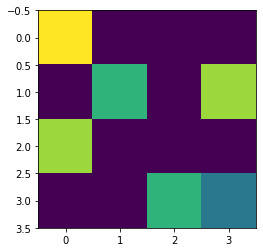

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

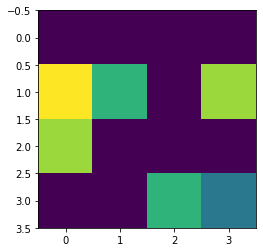

<IPython.core.display.Javascript object>

The State Of the Agent
4
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
12
Q table's action Next State
5


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

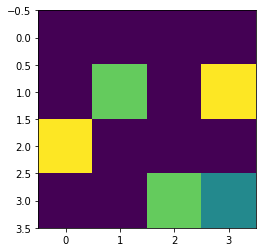

<IPython.core.display.Javascript object>

The State Of the Agent
5
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
12
Q table's action Next State
6


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

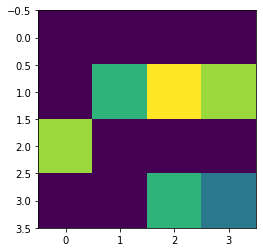

<IPython.core.display.Javascript object>

The State Of the Agent
6
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
12
Q table's action Next State
10


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

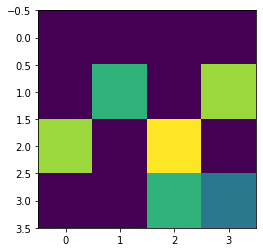

<IPython.core.display.Javascript object>

The State Of the Agent
10
Action Taken by Agent from Q table
0
Maximum Reward Collected By The Agent
27
Q table's action Next State
14


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

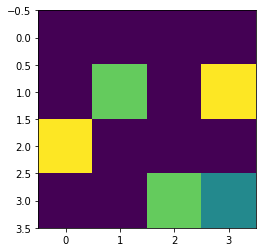

<IPython.core.display.Javascript object>

The State Of the Agent
14
Action Taken by Agent from Q table
2
Maximum Reward Collected By The Agent
227
Q table's action Next State
15


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

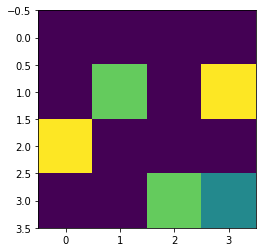

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

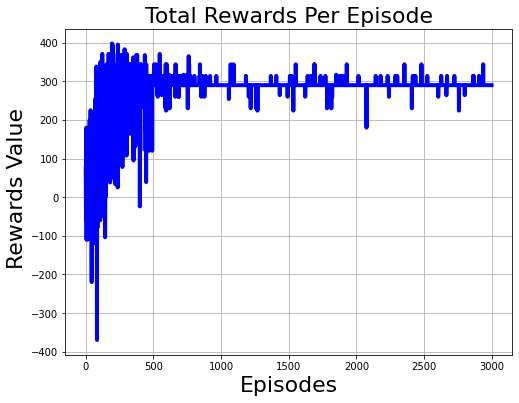

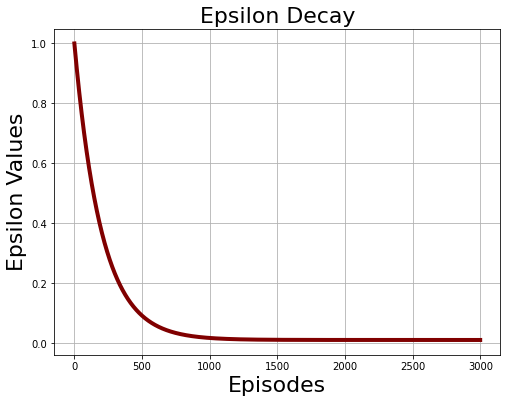

In [ ]:
env=GridEnvironment()
env.reset()
agent=SARSA(env)
agent.train(3000)
agent.Agent()
agent.graphs()